In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Display summary statistics
print(df.describe(include='all'))


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

## Perform Exploratory Data Analysis (EDA)
### We'll analyze various aspects of the dataset:

1. Data Types and Missing Values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


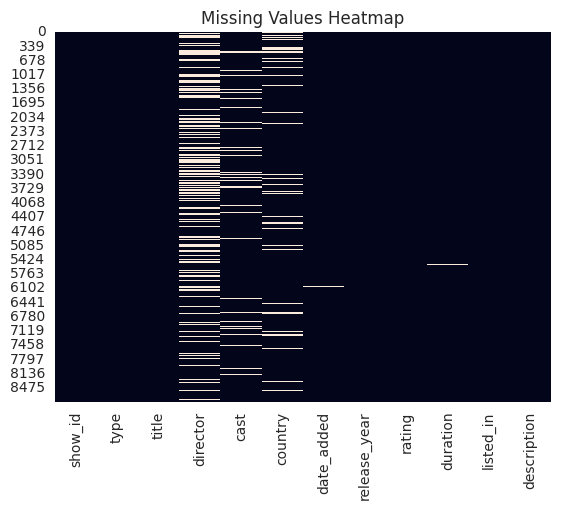

In [2]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [3]:

# ---------------------------------------------
# 1. Convert 'date_added' to datetime format
# ---------------------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a new column for year added (it's optional, but I prefer to do for more clearness)
df['year_added'] = df['date_added'].dt.year

# ---------------------------------------------
# 2. Clean 'duration' and create numeric versions
# ---------------------------------------------

# First, create two helper columns:
# One to store numeric value, one for units (e.g., "min" or "Season")
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

# fill NaNs with 0 or leave them to analyze missing durations
df['duration_num'] = df['duration_num'].fillna(0)

# ---------------------------------------------
# 3. Separate Movie and TV Show durations
# ---------------------------------------------
# For clarity, we can create a separate duration field per type
df['movie_duration_min'] = df.apply(
    lambda row: row['duration_num'] if row['type'] == 'Movie' else None,
    axis=1
)

df['tv_show_seasons'] = df.apply(
    lambda row: row['duration_num'] if row['type'] == 'TV Show' else None,
    axis=1
)


2. Distribution of Content Types

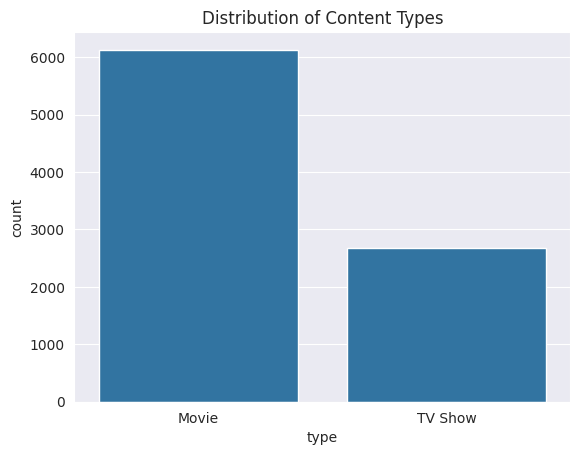

In [4]:
# Count of Movies vs TV Shows
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.show()

3. Top 10 Countries with Most Content

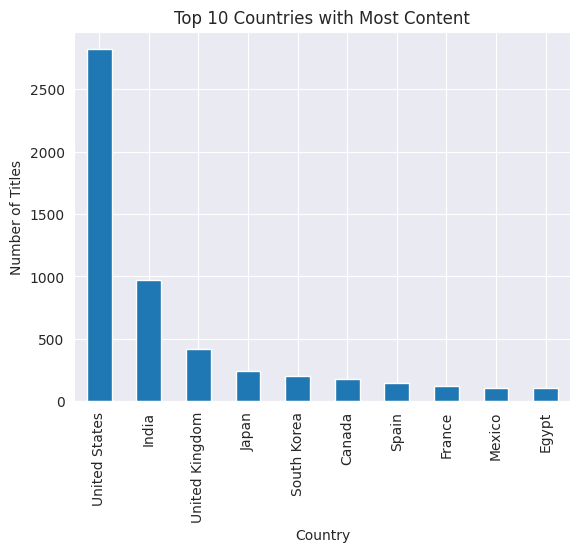

In [5]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


4. Content Added Over the Years

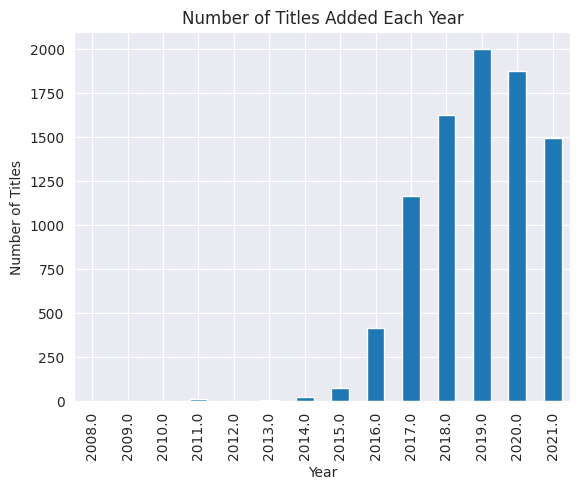

In [6]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Plot the number of titles added each year
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


5. Duration Analysis

Found 3 movies with missing duration


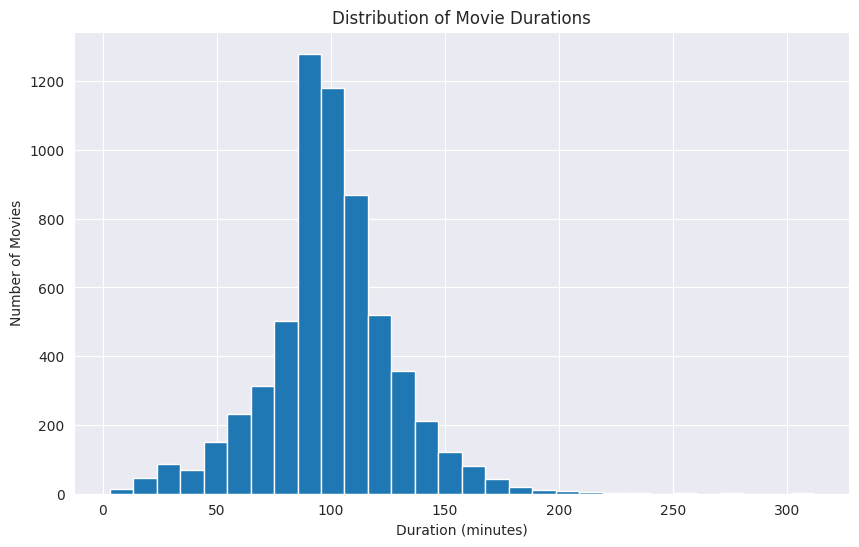

In [13]:
# For Movies
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract(r'(\d+)').astype(float)
# Add check for missing values and handle NaN
if movies['duration_int'].isnull().any():
    print(f"Found {movies['duration_int'].isnull().sum()} movies with missing duration")
    movies = movies.dropna(subset=['duration_int'])

plt.figure(figsize=(10, 6))
movies['duration_int'].hist(bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


In [8]:
# Summary of all columns (default: only numerical)
print(df.describe(include='all'))


       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   

              country                     date_added  release_year rating  \
count            7976                           8709   8807.000000   8803   
unique            748        

In [9]:
# Summary stats for numerical features only
numerical_cols = ['release_year', 'movie_duration_min', 'tv_show_seasons']
print(df[numerical_cols].describe())


       release_year  movie_duration_min  tv_show_seasons
count   8807.000000         6131.000000      2676.000000
mean    2014.180198           99.528462         1.764948
std        8.819312           28.369284         1.582752
min     1925.000000            0.000000         1.000000
25%     2013.000000           87.000000         1.000000
50%     2017.000000           98.000000         1.000000
75%     2019.000000          114.000000         2.000000
max     2021.000000          312.000000        17.000000


In [10]:
# Most frequent values in selected categorical features
print(df['type'].value_counts())
print(df['rating'].value_counts())
print(df['country'].value_counts().head(10))


type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64
